<h1 align="center"><b>CS116.M11 - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>BÀI TẬP BT13 - NGÀY 30/11/2021</b></h1>

# **Thông tin sinh viên**

1. ***MSSV:*** 19520214
2. ***Họ tên:*** Cao Hưng Phú
3. ***Bài tập:*** Bài tập 13
4. ***Ngày thực hiện:*** 30/11/2021

# **Bài làm**

#### **Collect trên google các ảnh**

In [1]:
!gdown --id "1YXTxYgQ4FN21CNaVlHnk507J0rZS_hUe"

Downloading...
From: https://drive.google.com/uc?id=1YXTxYgQ4FN21CNaVlHnk507J0rZS_hUe
To: /content/cs116_30_11_2021.zip
100% 8.35M/8.35M [00:00<00:00, 31.6MB/s]


In [2]:
!unzip "/content/cs116_30_11_2021.zip"

Archive:  /content/cs116_30_11_2021.zip
   creating: cs116_30_11_2021/
   creating: cs116_30_11_2021/car/
  inflating: cs116_30_11_2021/car/1.jpg  
  inflating: cs116_30_11_2021/car/2.jpg  
  inflating: cs116_30_11_2021/car/3.jpg  
   creating: cs116_30_11_2021/cat/
  inflating: cs116_30_11_2021/cat/1.jpg  
  inflating: cs116_30_11_2021/cat/2.jpg  
  inflating: cs116_30_11_2021/cat/3.jpg  
   creating: cs116_30_11_2021/dog/
  inflating: cs116_30_11_2021/dog/1.jpg  
  inflating: cs116_30_11_2021/dog/2.jpg  
  inflating: cs116_30_11_2021/dog/3.jpg  
   creating: cs116_30_11_2021/person/
  inflating: cs116_30_11_2021/person/1.jpg  
  inflating: cs116_30_11_2021/person/2.jpg  
  inflating: cs116_30_11_2021/person/3.jpg  
   creating: cs116_30_11_2021/tree/
  inflating: cs116_30_11_2021/tree/1.jpg  
  inflating: cs116_30_11_2021/tree/2.jpg  
  inflating: cs116_30_11_2021/tree/3.jpg  


#### **Bước 1: Load pretrained model VGG16**

In [3]:
from keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

#### **Bước 2, 3: Load các ảnh trong 1 thư mục + Rút trích đặc trưng các ảnh trong thư mục**

In [4]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

import numpy as np

path_dataset = "cs116_30_11_2021"

list_feature = []
list_path_image = []

for sub_class in os.listdir(path_dataset):
  sub_class_path = os.path.join(path_dataset, sub_class)
  for sub_file in os.listdir(sub_class_path):
    sub_path_file = os.path.join(sub_class_path, sub_file)
    img = image.load_img(sub_path_file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    feature = model.predict(x)
    list_feature.append(feature)
    list_path_image.append(sub_path_file)
    print("Done: {}".format(sub_path_file))

Done: cs116_30_11_2021/dog/3.jpg
Done: cs116_30_11_2021/dog/2.jpg
Done: cs116_30_11_2021/dog/1.jpg
Done: cs116_30_11_2021/tree/3.jpg
Done: cs116_30_11_2021/tree/2.jpg
Done: cs116_30_11_2021/tree/1.jpg
Done: cs116_30_11_2021/person/3.jpg
Done: cs116_30_11_2021/person/2.jpg
Done: cs116_30_11_2021/person/1.jpg
Done: cs116_30_11_2021/cat/3.jpg
Done: cs116_30_11_2021/cat/2.jpg
Done: cs116_30_11_2021/cat/1.jpg
Done: cs116_30_11_2021/car/3.jpg
Done: cs116_30_11_2021/car/2.jpg
Done: cs116_30_11_2021/car/1.jpg


#### **Bước 4, 5: Đọc ảnh truy vấn + Rút trích đặc trưng ảnh truy vấn**

In [5]:
def getFeatureImage(path_image):
  img = image.load_img(path_image, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x = preprocess_input(x)
  return model.predict(x)

In [6]:
# Tải ảnh và trích xuất đặc trưng từ url

url_image = "https://uit.company/CS116/1.jpg"

path_save_image = "test.jpg"
!curl -o $path_save_image $url_image
image_test_feature = getFeatureImage(path_save_image)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90953  100 90953    0     0   101k      0 --:--:-- --:--:-- --:--:--  101k


#### **Bước 6: Dùng mô hình KNN search với top K = 3 để tìm các đặc trưng gần với đặc trưng truy vấn nhất**

In [7]:
dataset = np.array(list_feature)
nsamples, nx, ny = dataset.shape
X = dataset.reshape((nsamples,nx*ny))

In [8]:
from sklearn.neighbors import NearestNeighbors
KNNSearch = NearestNeighbors(n_neighbors=3).fit(X)

In [9]:
distances, indices = KNNSearch.kneighbors(image_test_feature)
index = indices[0]

#### **Bước 7: Show top K ảnh gần nhất**

In [10]:
# Show image 1x4
import cv2
import matplotlib.pyplot as plt
def showImage1x4(img_1, tit_1, img_2, tit_2, img_3, tit_3, img_4, tit_4):
  plt.figure(figsize = (20, 20))
  plt.subplot(1, 4, 1)
  plt.title(tit_1)
  img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
  img_1 = plt.imshow(img_1, interpolation = 'bicubic')
  plt.subplot(1, 4, 2)
  plt.title(tit_2)
  img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
  img_2 = plt.imshow(img_2, interpolation = 'bicubic')
  plt.subplot(1, 4, 3)
  plt.title(tit_3)
  img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)
  img_3 = plt.imshow(img_3, interpolation = 'bicubic')
  plt.subplot(1, 4, 4)
  plt.title(tit_4)
  img_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB)
  img_4 = plt.imshow(img_4, interpolation = 'bicubic')

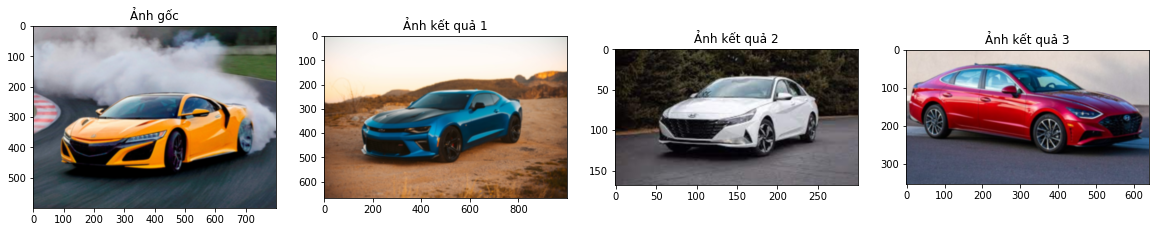

In [11]:
#Ảnh gốc
img_1 = cv2.imread(path_save_image)
tit_1 = "Ảnh gốc"

#Ảnh KQ1
img_2 = cv2.imread(list_path_image[index[0]])
tit_2 = "Ảnh kết quả 1"

#Ảnh KQ2
img_3 = cv2.imread(list_path_image[index[1]])
tit_3 = "Ảnh kết quả 2"

#Ảnh KQ3
img_4 = cv2.imread(list_path_image[index[2]])
tit_4 = "Ảnh kết quả 3"

showImage1x4(img_1, tit_1, img_2, tit_2, img_3, tit_3, img_4, tit_4)